In [97]:
!pip install opencv-python mediapipe scikit-learn matplotlib

In [98]:
!pip install tensorflow

In [99]:
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import cv2

In [100]:
#Extrag Keypoints folosing MP
mp_holistic = mp.solutions.holistic #model holistic
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [101]:
def mediapipe_detection(image, model):
    image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion 
    image.flags.writeable = False   #imaginea nu e writeable 
    results = model.process(image)  #make prediction
    image.flags.writeable = True    #Imaginea e writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion
    return image, results 

In [102]:
#desenez punctele de conexiune ale pozitiei, fetei si mainilor 
mp_drawing = mp.solutions.drawing_utils
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [103]:
mp_drawing = mp.solutions.drawing_utils
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION
                             ,mp_drawing.DrawingSpec(color= (80,110,10),thickness=1, circle_radius=1), #culoarea punctului
                             mp_drawing.DrawingSpec(color= (80,256,121),thickness=1, circle_radius=1) #culoarea legaturii dintre puncte 
                             ) 
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
                             ,mp_drawing.DrawingSpec(color= (80,22,10),thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color= (80,44,121),thickness=2, circle_radius=2)
                             ) 
    #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
                             ,mp_drawing.DrawingSpec(color= (121,22,76),thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color= (121,44,250),thickness=2, circle_radius=2)
                             )
    #Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
                             ,mp_drawing.DrawingSpec(color= (245,117,66),thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color= (245,66,230),thickness=2, circle_radius=2)
                             ) 

In [104]:
mp_holistic.POSE_CONNECTIONS??

Type:        frozenset
String form: frozenset({(15, 21), (16, 20), (18, 20), (3, 7), (14, 16), (23, 25), (28, 30), (11, 23), (27, 31), (6, 8), (15, 17), (24, 26), (16, 22), (4, 5), (5, 6), (29, 31), (12, 24), (23, 24), (0, 1), (9, 10), (1, 2), (0, 4), (11, 13), (30, 32), (28, 32), (15, 19), (16, 18), (25, 27), (26, 28), (12, 14), (17, 19), (2, 3), (11, 12), (27, 29), (13, 15)})
Length:      35
Docstring:  
frozenset() -> empty frozenset object
frozenset(iterable) -> frozenset object

Build an immutable unordered collection of unique elements.

In [114]:
cap = cv2.VideoCapture(0)
#Setez modelul mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():

        #Read feed
        ret, frame = cap.read()

        #Detectez
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image,results)
        #Afisez pe ecran
        cv2.imshow('OpenCv Feed', image)

        #Asa ies din loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [106]:
cap.release()
cv2.destroyAllWindows()

In [111]:
len(results.pose_landmarks.landmark)

33

In [115]:
results.right_hand_landmarks.landmark 

AttributeError: 'NoneType' object has no attribute 'landmark'

In [116]:
len(results.left_hand_landmarks.landmark)
#am reluat comanda introducand mana stanga si am primit landmarks

21

In [151]:
frame

array([[[164, 170, 169],
        [163, 169, 168],
        [163, 169, 168],
        ...,
        [ 23,  56,  62],
        [ 23,  60,  61],
        [ 22,  63,  59]],

       [[163, 169, 168],
        [163, 169, 168],
        [163, 169, 168],
        ...,
        [ 24,  56,  62],
        [ 24,  59,  60],
        [ 22,  60,  57]],

       [[162, 168, 168],
        [162, 168, 168],
        [163, 169, 169],
        ...,
        [ 30,  55,  61],
        [ 27,  55,  58],
        [ 26,  57,  56]],

       ...,

       [[160, 153, 130],
        [160, 153, 130],
        [160, 153, 130],
        ...,
        [ 17,  22,  34],
        [ 16,  21,  33],
        [ 16,  21,  33]],

       [[160, 155, 130],
        [159, 154, 129],
        [160, 155, 130],
        ...,
        [ 19,  22,  33],
        [ 18,  21,  32],
        [ 18,  21,  33]],

       [[161, 156, 131],
        [161, 156, 131],
        [163, 157, 131],
        ...,
        [ 19,  21,  31],
        [ 19,  21,  32],
        [ 19,  21,  33]]

In [152]:
draw_styled_landmarks(frame, results)

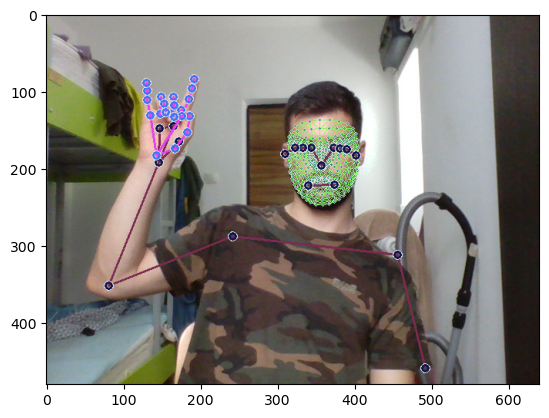

In [153]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# Extragerea valorilor

In [154]:
results.face_landmarks.landmark

[x: 0.55777264
y: 0.43971562
z: -0.016545167
, x: 0.55573654
y: 0.40903205
z: -0.033730842
, x: 0.55694544
y: 0.41834107
z: -0.01653101
, x: 0.5505487
y: 0.38213238
z: -0.026471999
, x: 0.5554444
y: 0.40035164
z: -0.03633856
, x: 0.55554557
y: 0.38935226
z: -0.034460858
, x: 0.5562231
y: 0.36344552
z: -0.020005075
, x: 0.5127581
y: 0.36390287
z: 0.009327869
, x: 0.55637705
y: 0.3478339
z: -0.018261755
, x: 0.55621743
y: 0.33713353
z: -0.020910608
, x: 0.5556649
y: 0.28740534
z: -0.016775519
, x: 0.55799174
y: 0.44428617
z: -0.015582814
, x: 0.55824447
y: 0.4479025
z: -0.013177067
, x: 0.55856156
y: 0.44947344
z: -0.010044444
, x: 0.5586593
y: 0.45301178
z: -0.007997469
, x: 0.55870736
y: 0.45714736
z: -0.008729304
, x: 0.55878806
y: 0.4625283
z: -0.0093546705
, x: 0.5590519
y: 0.46825412
z: -0.0073245866
, x: 0.55955493
y: 0.47755098
z: 0.00072762993
, x: 0.5561361
y: 0.41350895
z: -0.030217806
, x: 0.55141497
y: 0.41330186
z: -0.020917792
, x: 0.4927841
y: 0.33265218
z: 0.03822441
, x

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
len(pose)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
len(results.right_hand_landmarks.landmark)*3

In [ ]:
np.zeros(21*3).shape

In [155]:
def extract_keypoints(results):
    #list comprehension
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [119]:
result_test = extract_keypoints(results)

In [120]:
np.save('0', result_test)

In [121]:
np.load('0.npy')

array([ 0.51089346,  0.5629127 , -0.59400362, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
#FAC FOLDERE PENTRU EXTRACTIE

In [122]:
#acesta e path-ul pentru array-uri 
DATA_PATH = os.path.join('MP_DATA')

#actiuni pe care incerc sa le detectez 
actions = np.array(['buna', 'ce faci', 'te iubesc'])

#30 de secvente de date
nr_sequences = 30

#fiecare video are 30 de frameuri lungime
sequence_length = 30

In [ ]:
#buna
##0
##1
##..
##29

#ce faci

#te iubesc 

In [123]:
for action in actions:
    for sequence in range(nr_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
# COLECTEZ DATE PENTRU TRAINING SI TESTING 

In [124]:
cap = cv2.VideoCapture(0)
#Setez modelul mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence= 0.5) as holistic:
    #loop in actiuni
    for action in actions:
        #loop prin secvente
        for sequence in range(nr_sequences):
            #loop prin durata secventei 
            for frame_num in range(sequence_length):
                #Read feed
                ret, frame = cap.read()
            
                #Detectez
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                    
                #Draw landmarks
                draw_styled_landmarks(image,results)

                #Logica colectarii cadrelor
                if frame_num == 0 :
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                
                #extrag keypoints si le pun in folderele lor
                #resultatele sunt cele provenite dupa mediapipe_detection
                keypoints = extract_keypoints(results)
                # MP_Data -> ex: buna -> secventa ( video)  0 -> cele 30 frame-uri pe video 
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #Afisez pe ecran
                cv2.imshow('OpenCv Feed', image)

                
                #Asa ies din loop
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
#ETAPA DE PREPROCESARE SI CREARE DE LABELS SI FEATURES 

In [156]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [157]:
label_map = { label:num for num,label in enumerate(actions)}

In [158]:
label_map

{'buna': 0, 'ce faci': 1, 'te iubesc': 2}

In [159]:
sequences, labels = [], []
for action in actions:
    for sequence in range(nr_sequences):
        window = []
        for frame_num in range (sequence_length):
            #echivalent cu 'ia frame 1 si pune-l in window', etc.
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
    

In [160]:
np.array(sequences).shape

(90, 30, 1662)

In [161]:
np.array(labels).shape

(90,)

In [162]:
X = np.array(sequences)

In [163]:
y = to_categorical(labels).astype(int)

In [164]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [166]:
y_train.shape

(85, 3)

In [ ]:
# BUILD AND TRAIN LSTM NEURAL NETWORK

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.callbacks import TensorBoard

In [168]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [169]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation ='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation ='relu')) 
model.add(LSTM(64, return_sequences=False, activation ='relu')) 
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [170]:
actions.shape[0]

3

In [171]:
 model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics= ['categorical_accuracy'])

In [172]:
model.fit(X_train, y_train, epochs = 1000, callbacks = [tb_callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - categorical_accuracy: 0.3288 - loss: 1.2320
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.3522 - loss: 1.0829
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4031 - loss: 7.5454
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.4130 - loss: 7.1536
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.2994 - loss: 17.5699
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.2838 - loss: 22.2451
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3523 - loss: 18.7482
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.3366 - loss: 16.4696
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3895 - loss: 26.7938
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3523 - loss: 13.1858
Epoch 11/1000
3/3 ━━━━━

In [173]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [174]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


In [175]:
res.flatten()

array([6.8947378e-20, 9.9868625e-01, 1.3137634e-03, 1.6059895e-14,
       8.2030389e-13, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.1048116e-29, 0.0000000e+00, 1.0000000e+00, 2.6367522e-29,
       1.0000000e+00, 0.0000000e+00, 1.5134224e-11], dtype=float32)

In [176]:
actions[np.argmax(res[2])]
#cea mai mare probabilitate (cea mai apropriata de 1) ne da actiunea care a fost detectata
#continui sa verific sa corespuna x_test cu y_test

'ce faci'

In [177]:
actions[np.argmax(y_test[2])]

'ce faci'

In [180]:
actions[np.argmax(res[4])]

'buna'

In [181]:
actions[np.argmax(y_test[4])]

'buna'

In [182]:
#salvarea modelului
model.save("action.h5")

In [ ]:
#EVALUARE UTILIZAND CONFUSION MATRIX SI ACURATETE

In [183]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [184]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [185]:
#Convertesc predictiile din forma [1,0,0],[0,1,0] si [0,0,1] in 0,1 sau 2
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [186]:
multilabel_confusion_matrix(ytrue, yhat)
#MATRICE DE CONFUZIE pentru evaluarea performantelor

array([[[3, 0],
        [1, 1]],

       [[2, 1],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [187]:
accuracy_score(ytrue,yhat)

0.8

In [ ]:
#TESTARE IN REAL-TIME

In [213]:

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors): #input_frame este imaginea pe care o iau
    output_frame = input_frame.copy() #copiez acel frame
    for num, prob in enumerate(res): #loop printre rezultate
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1) #desenez un dreptunghi dinamic, prob*100 schimba lungimea dreptunghiului in fct de cat de mare e probab de recunoastere
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

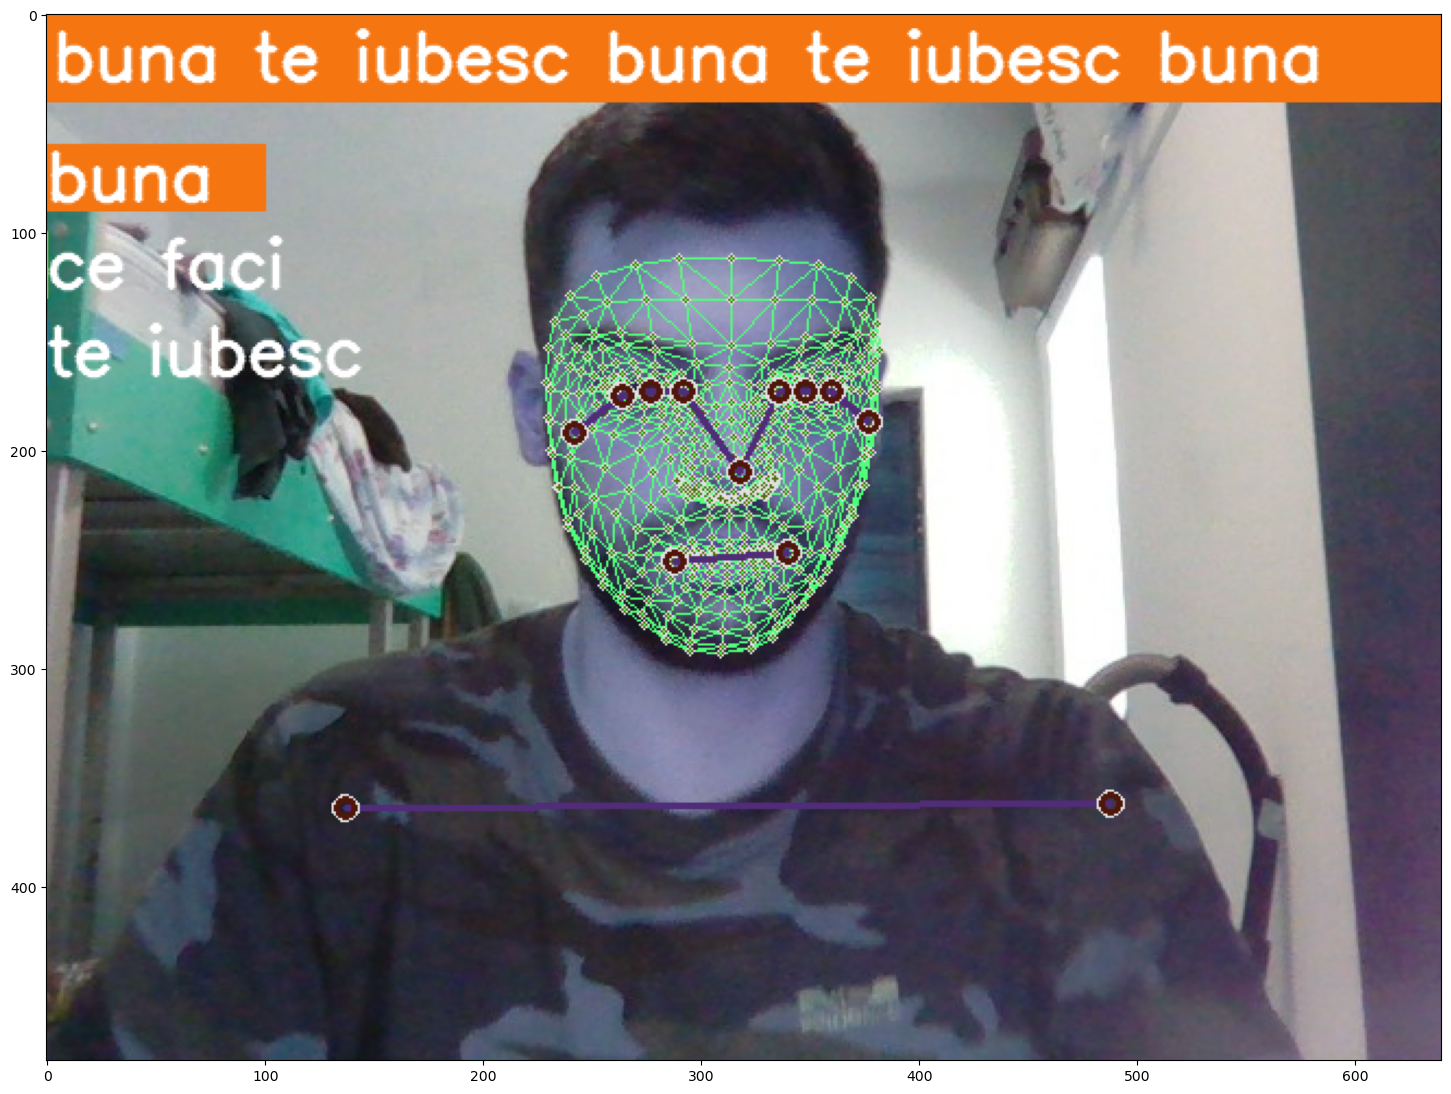

In [212]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))


In [215]:
sequence = [] #cand am 30 de frame uri aici pornesc predictia
sentence = [] #concatenez istoricul de predictii
threshold = 0.8 #o sa folosesc rezultatele doar daca sunt peste acest prag 

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Detectez
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #Logica de vizualizare
            if res[np.argmax(res)] > threshold: #valoarea maxima din res e mai mare decat threshold
                if len(sentence) > 0: #verific daca am cuvinte in array 
                    if actions[np.argmax(res)] != sentence[-1]: #verific daca cuvantul e acelasi cu cel dinaintea lui
                        sentence.append(actions[np.argmax(res)])  #daca nu e il adaug in lista, iar daca este dau skip pentru a preveni duplpicarea
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]


            # Vizualizarea probabilitatii 
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # (0,0)= stanga sus, (x=640=latime dreptungi, y=40=inaltime dreptungi), culoare, -1 = desenat plin, fara contur
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Afisez
        cv2.imshow('OpenCV Feed', image)

        # Asa ies din loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [196]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
model.predict(np.expand_dims(X_test[0], axis =0)) 
#pot trece printr-o singura secventa, pe rand

In [ ]:
np.expand_dims(X_test[0],axis = 2)

In [ ]:
np.expand_dims(X_test[0], axis = 1)

In [194]:
np.argmax(res)>threshold

True